# Importing and inspecting data
v.ekc

Here is a basic flow of how you want to tend to your data:

1. Confirm it loaded correctly

2. Inspect its shape and dimensions

3. Identify the data types, making sure the data types loaded as expected

   - determine the categorical features
   - did your numerical features load as float/integers?

5. Identify missing values

6. Filter for meaningful subsets

7. Summarize patterns

This is part of the **Extract** part of the Extract Transform Load (ETL) pipeline

![image](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*s4pxYAWi4AWAssPFwXzrNQ.jpeg)

In [1]:
import numpy as np
import pandas as pd

## 1. Import data

You can read in from:
- local file in your working directory
- online file

One cool thing is that when you load excel files, you can specify what sheet you want to load!

### 1a: Example loading local .csv file

In [2]:
# To use one of the columns as your row index
df = pd.read_csv('earthquakes.csv',index_col='code')
df.head(2)

,alert,cdi,detail,dmin,felt,gap,ids,mag,magType,mmi,...,sources,status,time,title,tsunami,type,types,tz,updated,url
code,,,,,,,,,,,,,,,,,,,,,
37389218,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,NaN,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
37389202,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,NaN,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...


### 1b: Example: replace default index values with a column name
You can also choose a column to be the row index names with `index_col`!

In [3]:
# read in an excel file
#  set the sheet name
#  set the row index

df = pd.read_excel('https://github.com/bethanyj0/data271_sp24/blob/main/demos/earthquakes.xlsx?raw=True',sheet_name = 'earthquakes',index_col='code')
df.head(2)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [ ]:
df.index.name

### 1c. Example: Reset the index: `df.reset_index(inplace=True/False)`

If you include `inplace=True`, this will revert the original DataFrame

In [4]:
#df.reset_index().head(2)

df.reset_index(inplace=True)
df.head(2)

,code,alert,cdi,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,37389218,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,37389202,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...


## 2. Initial Inspection of the Data

Here is your checklist to inspect the data:

| Code | Purpose |
|------|----------|
| `df.empty()` | Returns `False` if it is non-empty |
| `df.head()` | Displays the first 5 rows of the DataFrame |
| `df.tail()` | Displays the last 5 rows of the DataFrame |
| `df.shape` | Returns the number of rows and columns `(rows, columns)` |
| `df.info()` | Shows column names, data types, and non-null counts |
| `df.columns` | Lists the column names |
| `df.dtypes` | Shows the data type of each column |
| `df.describe()` | Displays summary statistics for numeric columns |


### 2a. Example: how to use the methods to inspect the data

In [5]:
# Is the data frame empty? Did import fail?
df.empty

False

In [6]:
# display the top few rows
df.head(3)

,code,alert,cdi,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,37389218,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,37389202,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,37389194,NaN,4.4,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...


In [7]:
# inspecting the last three rows
df.tail(3)

,code,alert,cdi,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
9329,2018261000,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.45260,NaN,276.0,",pr2018261000,",2.40,md,...,",pr,",reviewed,1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0,earthquake,",geoserve,origin,phase-data,",-240.0,1537243777410,https://earthquake.usgs.gov/earthquakes/eventp...
9330,38063959,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01865,NaN,61.0,",ci38063959,",1.10,ml,...,",ci,",reviewed,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537230211640,https://earthquake.usgs.gov/earthquakes/eventp...
9331,38063935,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01698,NaN,39.0,",ci38063935,",0.66,ml,...,",ci,",reviewed,1537228864470,"M 0.7 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537305830770,https://earthquake.usgs.gov/earthquakes/eventp...


In [8]:
# info() gives more information, including the number of non-nulls
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   code     9332 non-null   str    
 1   alert    59 non-null     str    
 2   cdi      329 non-null    float64
 3   detail   9332 non-null   str    
 4   dmin     6139 non-null   float64
 5   felt     329 non-null    float64
 6   gap      6164 non-null   float64
 7   ids      9332 non-null   str    
 8   mag      9331 non-null   float64
 9   magType  9331 non-null   str    
 10  mmi      93 non-null     float64
 11  net      9332 non-null   str    
 12  nst      5364 non-null   float64
 13  place    9332 non-null   str    
 14  rms      9332 non-null   float64
 15  sig      9332 non-null   int64  
 16  sources  9332 non-null   str    
 17  status   9332 non-null   str    
 18  time     9332 non-null   int64  
 19  title    9332 non-null   str    
 20  tsunami  9332 non-null   int64  
 21  type     9332 non-null   

### Checkin: are there any columns with missing values?

#### Answer

In [9]:
len(df)

9332

It looks like the dataset has 9,332 observations. Looking at the Non-Null Count column, we see that the following features have less than 9,332 non-nulls:
- `aleart`
- `cdi`
- `dmin`
- `felt`
- `gap`
- `mag`
- `magType`
- `mmi`
- `nst`
- `tz`

In [10]:
# summary statistics for the numeric features
df.describe()

,cdi,dmin,felt,gap,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
count,329.000000,6139.000000,329.000000,6164.000000,9331.000000,93.000000,5364.000000,9332.000000,9332.000000,9.332000e+03,9332.000000,9331.000000,9.332000e+03
mean,2.754711,0.544925,12.310030,121.506588,1.497345,3.651398,19.053878,0.362122,56.899914,1.538284e+12,0.006537,-451.990140,1.538537e+12
std,1.010637,2.214305,48.954944,72.962363,1.203347,1.790523,15.492315,0.317784,91.872163,6.080306e+08,0.080589,231.752571,6.564135e+08
min,0.000000,0.000648,0.000000,12.000000,-1.260000,0.000000,0.000000,0.000000,0.000000,1.537229e+12,0.000000,-720.000000,1.537230e+12
25%,2.000000,0.020425,1.000000,66.142500,0.720000,2.680000,8.000000,0.119675,8.000000,1.537793e+12,0.000000,-540.000000,1.537996e+12
50%,2.700000,0.059050,2.000000,105.000000,1.300000,3.720000,15.000000,0.210000,26.000000,1.538245e+12,0.000000,-480.000000,1.538621e+12
75%,3.300000,0.177250,5.000000,159.000000,1.900000,4.570000,25.000000,0.590000,56.000000,1.538766e+12,0.000000,-480.000000,1.539110e+12
max,8.400000,53.737000,580.000000,355.910000,7.500000,9.120000,172.000000,1.910000,2015.000000,1.539475e+12,1.000000,720.000000,1.539537e+12


## 3. Understanding the variables/features: numeric versus caterogical

We know which features are quantities and which are category from step 2 when when run:
- `df.info()`
- `df.describe()`

Next, we can further explore the numeric and categorical data.

Depending on the data type, we can apply different methods to get a better feeling of the dataset:

| Variable Type | Code | Purpose |
|---------------|------|----------|
| Categorical/Numeric | `df["status"].unique()` | Shows the distinct categories in the column |
| Categorical/Numeric | `df["status"].value_counts()` | Counts how many times each category appears |
| Categorical/Numeric | `df["status"].count()` | Counts non-missing values in the column |
| Numeric | `df["mag"].describe()` | Shows summary statistics (mean, std, min, max, quartiles) |
| Numeric | `df["mag"].mean()` | Computes the average value |
| Numeric | `df["mag"].median()` | Computes the median value |


### 3a. Categorical Features

#### Selecting the categorical features

We can select the categorical values with `df.select_dtypes(object)`

In [11]:
# select all columns with object datatypes
df.select_dtypes(object)

#df.select_dtypes(object).shape

/var/folders/jv/57sjsr0n54nf0y81lryv4r0c0000gn/T/ipykernel_29994/1078668471.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.select_dtypes(object)


,code,alert,detail,ids,magType,net,place,sources,status,title,type,types,url
0,37389218,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389218,",ml,ci,"9km NE of Aguanga, CA",",ci,",automatic,"M 1.4 - 9km NE of Aguanga, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
1,37389202,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389202,",ml,ci,"9km NE of Aguanga, CA",",ci,",automatic,"M 1.3 - 9km NE of Aguanga, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
2,37389194,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389194,",ml,ci,"8km NE of Aguanga, CA",",ci,",automatic,"M 3.4 - 8km NE of Aguanga, CA",earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",https://earthquake.usgs.gov/earthquakes/eventp...
3,37389186,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389186,",ml,ci,"9km NE of Aguanga, CA",",ci,",automatic,"M 0.4 - 9km NE of Aguanga, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
4,73096941,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",nc73096941,",md,nc,"10km NW of Avenal, CA",",nc,",automatic,"M 2.2 - 10km NW of Avenal, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",https://earthquake.usgs.gov/earthquakes/eventp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,73086771,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",nc73086771,",md,nc,"9km ENE of Mammoth Lakes, CA",",nc,",reviewed,"M 0.6 - 9km ENE of Mammoth Lakes, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
9328,38063967,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci38063967,",ml,ci,"3km W of Julian, CA",",ci,",reviewed,"M 1.0 - 3km W of Julian, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",https://earthquake.usgs.gov/earthquakes/eventp...
9329,2018261000,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",pr2018261000,",md,pr,"35km NNE of Hatillo, Puerto Rico",",pr,",reviewed,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",earthquake,",geoserve,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
9330,38063959,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci38063959,",ml,ci,"9km NE of Aguanga, CA",",ci,",reviewed,"M 1.1 - 9km NE of Aguanga, CA",earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",https://earthquake.usgs.gov/earthquakes/eventp...


### 3b. Categorical Features
#### Exploring categorical features
We want to find the *levels* of the feature aka the unique categories and the count of each

In [12]:
# we can look for unique values in a column
df.status.unique()

<StringArray>
['automatic', 'reviewed']
Length: 2, dtype: str

In [13]:
# Get the number of rows in each category
df.status.value_counts()

status
reviewed     7797
automatic    1535
Name: count, dtype: int64

#### plot it for fun

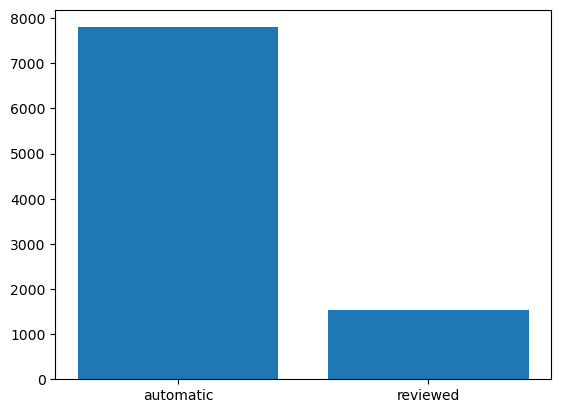

In [14]:
import matplotlib.pyplot as plt
plt.bar(df.status.unique(), df.status.value_counts());

### 3b. Numeric Feature
#### Grabbing the **numeric** columns
- `df.select_dtypes(int)`
- `df.select_dtypes('number')`

In [15]:
# select all columns with ints
df.select_dtypes(int)

,sig,time,tsunami,updated
0,28,1539475168010,0,1539475395144
1,26,1539475129610,0,1539475253925
2,192,1539475062610,0,1539536756176
3,3,1539474978070,0,1539475196167
4,72,1539474716050,0,1539477547926
...,...,...,...,...
9327,6,1537230228060,0,1537285598315
9328,15,1537230135130,0,1537276800970
9329,89,1537229908180,0,1537243777410
9330,19,1537229545350,0,1537230211640


In [16]:
# select all columns with numeric datatypes
df.select_dtypes('number')

,cdi,dmin,felt,gap,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
0,NaN,0.008693,NaN,85.0,1.35,NaN,26.0,0.19,28,1539475168010,0,-480.0,1539475395144
1,NaN,0.020030,NaN,79.0,1.29,NaN,20.0,0.29,26,1539475129610,0,-480.0,1539475253925
2,4.4,0.021370,28.0,21.0,3.42,NaN,111.0,0.22,192,1539475062610,0,-480.0,1539536756176
3,NaN,0.026180,NaN,39.0,0.44,NaN,26.0,0.17,3,1539474978070,0,-480.0,1539475196167
4,NaN,0.077990,NaN,192.0,2.16,NaN,18.0,0.05,72,1539474716050,0,-480.0,1539477547926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,NaN,0.018060,NaN,185.0,0.62,NaN,13.0,0.03,6,1537230228060,0,-480.0,1537285598315
9328,NaN,0.030410,NaN,50.0,1.00,NaN,28.0,0.21,15,1537230135130,0,-480.0,1537276800970
9329,NaN,0.452600,NaN,276.0,2.40,NaN,9.0,0.41,89,1537229908180,0,-240.0,1537243777410
9330,NaN,0.018650,NaN,61.0,1.10,NaN,27.0,0.10,19,1537229545350,0,-480.0,1537230211640


### 3d. Numeric Features
#### Accessing summary statistics from `df.describe()`  

We can get the whole readout with `df.describe()` or we can pull out certain statistics with methods such as
- `df.col_name.mean()`
- `df.col_name.median()` or `df.col_name.quantile(0.5)`
- `df.col_name.quantile(0.75)`
- `df.col_name.sum()`

In [17]:
# if we would like to just describe one column, such as mag (magnitude)
df.mag.describe()

count    9331.000000
mean        1.497345
std         1.203347
min        -1.260000
25%         0.720000
50%         1.300000
75%         1.900000
max         7.500000
Name: mag, dtype: float64

In [18]:
# mean of a column
df.mag.mean()

np.float64(1.4973454077805166)

In [19]:
# median
df.mag.median()

np.float64(1.3)

In [20]:
# quantile
df.mag.quantile(0.5)

np.float64(1.3)

In [21]:
# sum of a column
df.mag.sum()

np.float64(13971.73)

In [22]:
# min of a column
df.mag.min()

np.float64(-1.26)

### 3e. Numeric Features
#### Min/max and argmin/argmax and idxmin/idxmax

- `min/max`: returns a float
- `argmin/argmax`: returns the integer index value
- `idxmin/idxmax`: returns the index name/row name

In [23]:
# max of a column
df.mag.max()

np.float64(7.5)

In [24]:
# POSITION of maximum (can also use min)
df.mag.argmax()

np.int64(5263)

In [25]:
# INDEX LABEL of maximum (can also use min)
df.mag.idxmax()

5263

### 3f. Numeric Features
#### Sorting: `df.sort_values(by=col_name, axis=0, ascending=True, inplace=False`

You can sort the values of columns 2 ways: 
- `df.col_name.sort_values()`
- `df.sort_values(by=col_name)`

In [26]:
# Sort values in a series
df.mag.sort_values()

2409   -1.26
6767   -1.26
6244   -1.24
4109   -1.23
2405   -1.22
        ... 
118     6.70
4363    6.70
837     7.00
5263    7.50
6404     NaN
Name: mag, Length: 9332, dtype: float64

In [27]:
# Sort values rows in a dataframe by a value
df.sort_values(by='mag')

,code,alert,cdi,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
2409,70806059,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01871,NaN,123.0,",av70806059,",-1.26,ml,...,",av,",reviewed,1538746911930,"M -1.3 - 41km ENE of Adak, Alaska",0,earthquake,",geoserve,origin,phase-data,",-600.0,1538774135050,https://earthquake.usgs.gov/earthquakes/eventp...
6767,70804594,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01558,NaN,139.0,",av70804594,",-1.26,ml,...,",av,",reviewed,1537846638890,"M -1.3 - 17km W of Akutan, Alaska",0,earthquake,",geoserve,origin,phase-data,",-540.0,1537997519390,https://earthquake.usgs.gov/earthquakes/eventp...
6244,70804824,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01961,NaN,110.0,",av70804824,",-1.24,ml,...,",av,",reviewed,1537934601100,"M -1.2 - 42km ENE of Adak, Alaska",0,earthquake,",geoserve,origin,phase-data,",-600.0,1538076576300,https://earthquake.usgs.gov/earthquakes/eventp...
4109,80311969,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01900,NaN,195.0,",mb80311969,",-1.23,md,...,",mb,",reviewed,1538354389900,"M -1.2 - 10km NW of Polson, Montana",0,earthquake,",geoserve,origin,phase-data,",-420.0,1538432509730,https://earthquake.usgs.gov/earthquakes/eventp...
2405,70806074,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02748,NaN,159.0,",av70806074,",-1.22,ml,...,",av,",reviewed,1538747692790,"M -1.2 - 43km ENE of Adak, Alaska",0,earthquake,",geoserve,origin,phase-data,",-600.0,1538774691260,https://earthquake.usgs.gov/earthquakes/eventp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1000hbkz,green,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.62300,NaN,25.0,",pt18286001,at00pgjb1a,us1000hbkz,",6.70,mww,...,",pt,at,us,",reviewed,1539429023560,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,earthquake,",geoserve,ground-failure,impact-link,losspager...",600.0,1539455437040,https://earthquake.usgs.gov/earthquakes/eventp...
4363,1000h4l1,green,2.2,https://earthquake.usgs.gov/fdsnws/event/1/que...,3.72800,1.0,23.0,",at00pfv7ja,us1000h4l1,pt18273000,",6.70,mww,...,",at,us,pt,",reviewed,1538304744240,"M 6.7 - 263km NNE of Ndoi Island, Fiji",1,earthquake,",dyfi,geoserve,impact-link,losspager,moment-te...",-720.0,1539348741510,https://earthquake.usgs.gov/earthquakes/eventp...
837,1000haa3,green,4.1,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.76300,3.0,14.0,",us1000haa3,pt18283003,at00pgehsk,",7.00,mww,...,",us,pt,at,",reviewed,1539204500290,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",600.0,1539378744253,https://earthquake.usgs.gov/earthquakes/eventp...
5263,1000h3p4,red,8.4,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.58900,18.0,27.0,",us1000h3p4,us1000h4p4,",7.50,mww,...,",us,us,",reviewed,1538128963480,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",480.0,1539123134531,https://earthquake.usgs.gov/earthquakes/eventp...


In [28]:
# Certain numeric methods won't automatically work on dataframes
#df.max()

### 3g. Numeric Features
#### Subsetting and `df.grouby()`

In [29]:
# You can do multiple columns at once if all numeric
df.loc[:,['mag','gap']].max()

mag      7.50
gap    355.91
dtype: float64

In [30]:
# Get the average of one column based on another column 
df.groupby('status')['mag'].mean()

status
automatic    1.515127
reviewed     1.493844
Name: mag, dtype: float64

In [31]:
# Get the average of multiple columns based on another column 
df.groupby('status')[['mag','gap']].mean()

,mag,gap
status,,
automatic,1.515127,104.425222
reviewed,1.493844,123.070439


## 4. Filtering DataFrames with boolean indexing

In [32]:
# keep only the rows where this boolean statement is true (mag greater than or equal to 7)
df[df.mag >= 7]

,code,alert,cdi,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
837,1000haa3,green,4.1,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.763,3.0,14.0,",us1000haa3,pt18283003,at00pgehsk,",7.0,mww,...,",us,pt,at,",reviewed,1539204500290,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",600.0,1539378744253,https://earthquake.usgs.gov/earthquakes/eventp...
5263,1000h3p4,red,8.4,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.589,18.0,27.0,",us1000h3p4,us1000h4p4,",7.5,mww,...,",us,us,",reviewed,1538128963480,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",480.0,1539123134531,https://earthquake.usgs.gov/earthquakes/eventp...


In [33]:
# important columns for earthquakes with magnitude greater than or equal to 7 OR caused a tsunami
df.loc[
    (df.tsunami == 1) | (df.mag >= 7),
    ['mag', 'title', 'tsunami', 'place']
].head(5)

,mag,title,tsunami,place
36,5.0,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,"165km NNW of Flying Fish Cove, Christmas Island"
118,6.7,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,"262km NW of Ozernovskiy, Russia"
501,5.6,"M 5.6 - 128km SE of Kimbe, Papua New Guinea",1,"128km SE of Kimbe, Papua New Guinea"
799,6.5,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1,"148km S of Severo-Kuril'sk, Russia"
816,6.2,"M 6.2 - 94km SW of Kokopo, Papua New Guinea",1,"94km SW of Kokopo, Papua New Guinea"


### Filtering DataFrames
#### Boolean mask for a substring: `df.place.str.contains(substring)`

#### Checkin: We want to select the earthquakes that occured in California.

Step 1: how can we create a boolean mask for the observations in column `place` that contains `California`?

##### Answer

In [34]:
mask = df.place.str.contains('California')
mask

0       False
1       False
2       False
3       False
4       False
        ...  
9327    False
9328    False
9329    False
9330    False
9331    False
Name: place, Length: 9332, dtype: bool

#### Checkin: We want to select the earthquakes that occured in California.
#### Boolean mask for a substring: `df.place.str.contains(substring)`
Step 2: Apply the mask for Californian earthquakes to the dataset.

##### Answer

In [35]:
df.loc[mask].head(5)

,code,alert,cdi,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
71,00660903,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.131,NaN,185.18,",nn00660903,",0.7,ml,...,",nn,",reviewed,1539445657953,"M 0.7 - 36km ENE of Big Pine, California",0,earthquake,",geoserve,origin,phase-data,",-480.0,1539482720187,https://earthquake.usgs.gov/earthquakes/eventp...
84,00660880,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.073,NaN,125.08,",nn00660880,",1.1,ml,...,",nn,",reviewed,1539442019022,"M 1.1 - 14km NE of East Quincy, California",0,earthquake,",geoserve,origin,phase-data,",-480.0,1539482695547,https://earthquake.usgs.gov/earthquakes/eventp...
96,00660828,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.030,NaN,88.54,",nn00660828,",0.9,ml,...,",nn,",reviewed,1539436205237,"M 0.9 - 60km E of Big Pine, California",0,earthquake,",geoserve,origin,phase-data,",-480.0,1539482676266,https://earthquake.usgs.gov/earthquakes/eventp...
162,00660894,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.160,NaN,65.02,",nn00660894,",1.1,ml,...,",nn,",reviewed,1539412316581,"M 1.1 - 29km ENE of Bridgeport, California",0,earthquake,",geoserve,origin,phase-data,",-480.0,1539482711726,https://earthquake.usgs.gov/earthquakes/eventp...
292,00660681,NaN,NaN,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.059,NaN,121.14,",nn00660681,",0.6,ml,...,",nn,",reviewed,1539370712565,"M 0.6 - 7km WNW of Tahoe Vista, California",0,earthquake,",geoserve,origin,phase-data,",-480.0,1539375548394,https://earthquake.usgs.gov/earthquakes/eventp...


#### Checkin: Now, let's subset the California earthquakes even further--we only want the columns `['mag', 'title', 'tsunami', 'place']`

##### Answer

In [36]:
df.loc[mask, ['mag', 'title', 'tsunami', 'place']].head(5)

,mag,title,tsunami,place
71,0.7,"M 0.7 - 36km ENE of Big Pine, California",0,"36km ENE of Big Pine, California"
84,1.1,"M 1.1 - 14km NE of East Quincy, California",0,"14km NE of East Quincy, California"
96,0.9,"M 0.9 - 60km E of Big Pine, California",0,"60km E of Big Pine, California"
162,1.1,"M 1.1 - 29km ENE of Bridgeport, California",0,"29km ENE of Bridgeport, California"
292,0.6,"M 0.6 - 7km WNW of Tahoe Vista, California",0,"7km WNW of Tahoe Vista, California"


#### Checkin summary

Additionally, we can also include an or statement. Say when we subset the Californian earthquakes, we look for `California` or `CA` in the column `place`.

In [37]:
# We might have missed some-- the USGS has tagged some locations as California and some as CA.
CA_df = df.loc[
    (df.place.str.contains('CA|California')),
    ['mag', 'title', 'tsunami', 'place']
]
CA_df.head(3)

,mag,title,tsunami,place
0,1.35,"M 1.4 - 9km NE of Aguanga, CA",0,"9km NE of Aguanga, CA"
1,1.29,"M 1.3 - 9km NE of Aguanga, CA",0,"9km NE of Aguanga, CA"
2,3.42,"M 3.4 - 8km NE of Aguanga, CA",0,"8km NE of Aguanga, CA"


In [38]:
# if we just want the columns related to magnitude
df.loc[
    (df.place.str.contains('CA|California')),
    [col for col in df.columns if 'mag' in col]
].head(3)

,mag,magType
0,1.35,ml
1,1.29,ml
2,3.42,ml


## Activity 

### Create a summary table with the magnitude `mag` and the place `place` of the smallest and the largest earthquakes in California

*Hints:*

Use the `CA_df`, the subsetted DataFrame with only Californian earthquakes.

The summary table will have two rows and 2 columns.

The columns should be `mag` and `place`.

The first row should contain the information for the smallest earthquake in California (lowest magnitude) and the second row should contain information for the largest earthquake) in California.

#### More hints

Use `.loc` to reference and subset the columns `mag` and `place`

Since you are using `.loc`, to find the min and max, you want to use the row names, not the index position value!

- `df.colname.idxmin()`
- `df.colname.idxmax()`

#### Answer

In [39]:
# This allows us to index with loc
CA_df.loc[
    [CA_df.mag.idxmin(), CA_df.mag.idxmax()],
    ['mag','place']
]

,mag,place
2510,-0.50,"6km W of Tahoe Vista, California"
1465,3.83,"109km WNW of Trinidad, CA"


### How many earthquakes in the dataset had a red alert?

*Hint*: `red` is a categorical feature.

What method can you use to count the occurances of each category?

#### Answer

In [40]:
df.alert.value_counts()['red']

np.int64(1)

### How many Oregon earthquakes are in the dataset?

Instead of California, let's count the Oregon earthquakes.

Include the column features: `['mag', 'title', 'tsunami', 'place']`

#### Answer

In [41]:
OR_df = df.loc[
    (df.place.str.contains('OR|Oregon')),
    ['mag', 'title', 'tsunami', 'place']
]
OR_df.shape

(27, 4)

# Appendix

## 1. What Do I Check When I First Load Data?

| Code | What It Tells Me |
|------|------------------|
| `df.head()` | What does the data look like? |
| `df.tail()` | What do the last rows look like? |
| `df.shape` | How big is the dataset? |
| `df.info()` | Are there missing values? What are the data types? |
| `df.columns` | What variables do I have? |
| `df.dtypes` | Which columns are numeric vs categorical? |
| `df.describe()` | What are the summary statistics of numeric columns? |


## 2. Explore Different Types of Variables

| Question | Code | When to Use |
|----------|------|-------------|
| What categories exist? | `df[col_name].unique()` | Categorical data |
| What is the count of each category? | `df[col_name].value_counts()` | Categorical data |
| How many valid observations are there? | `df[col_name].count()` | Any column |
| What are the summary statistics? | `df[col_name].describe()` | Numeric data |
| What is the average value? | `df[col_name].mean()` | Numeric data |
| What is the middle value? | `df[col_name].median()` | Numeric data |
